<IPython.core.display.Javascript object>


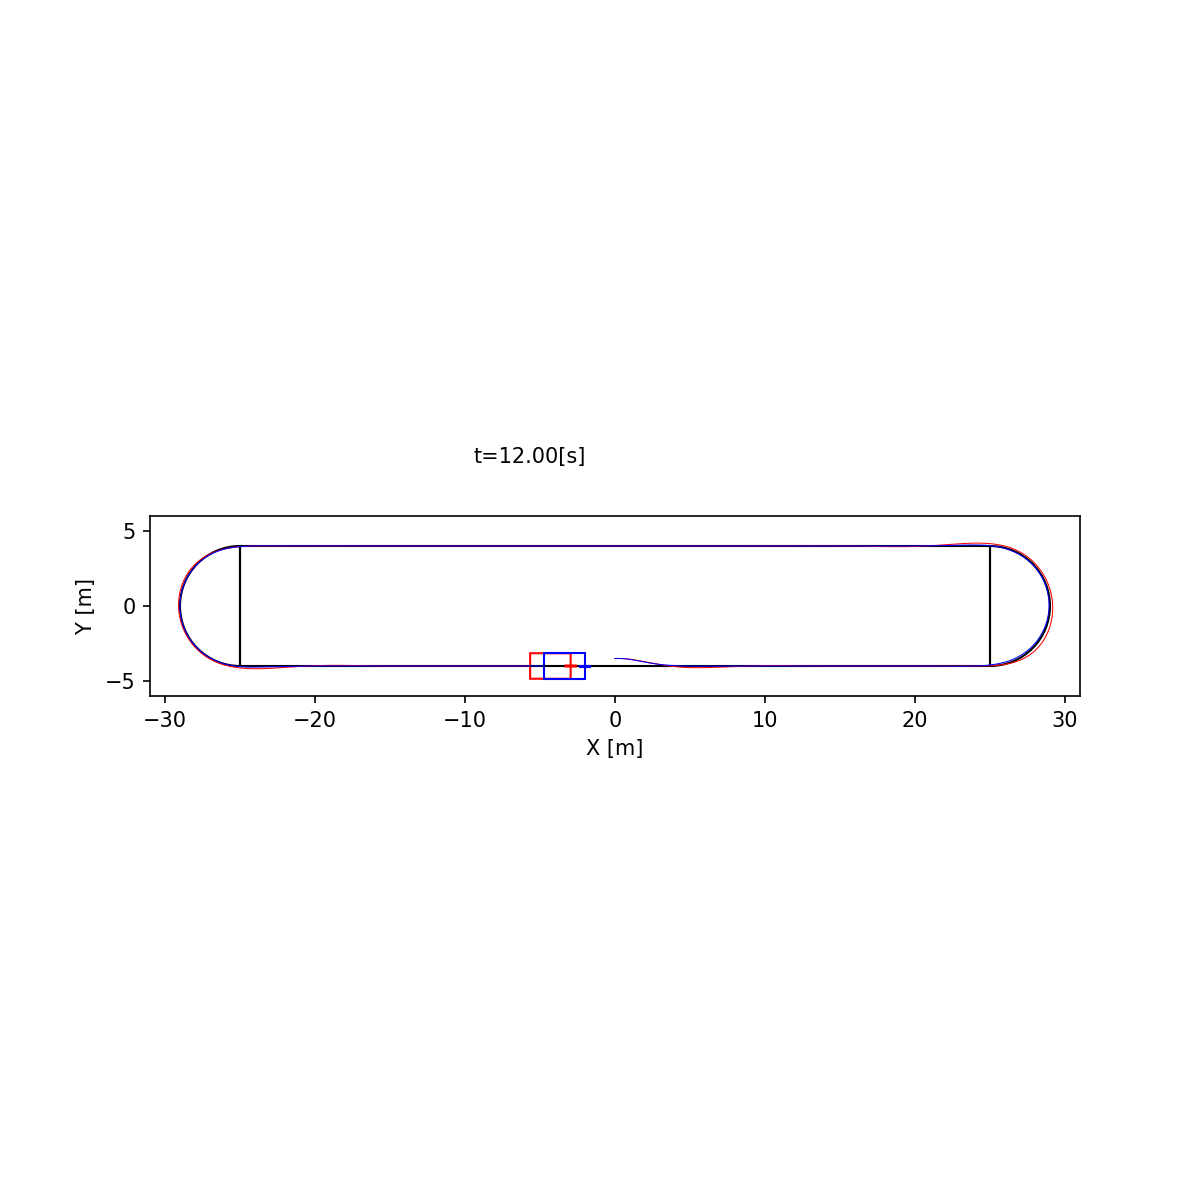

In [1]:
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.animation as anm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy
import kal_python as kal

Q = np.diag([10.0, 3.0])
R = np.diag([5.0])


if __name__ == '__main__':
    cf=kal.config.config()
    l=50
    r=4
    c = kal.course.course(r,l)
    x_start=np.array([0,-c.R+0.5,0])
    pid_car = kal.vehicle_kinematics.agent_for_PID(np.array([10.0,np.pi/6]),copy.copy(c))
    mpc_car = kal.mpc.agent_for_MPC(np.array([10.0,np.pi/6]),10,Q,R,copy.copy(c))
    mpc_car2 = kal.mpc.agent_for_MPC(np.array([10.0,np.pi/6]),30,Q,R,copy.copy(c))
    
    z = kal.vehicle_kinematics.vehicle(x_start,1.7,2.7,"green",pid_car,c)
    z2 = kal.vehicle_kinematics.vehicle(x_start,1.7,2.7,"red",mpc_car,c)
    z3 = kal.vehicle_kinematics.vehicle(x_start,1.7,2.7,"blue",mpc_car2,c)
    
    world=kal.world.World(12,cf.Ts,l/2+r+2,r+2)
    #world.append(z)
    world.append(z2)
    world.append(z3)
    world.append(c)
    world.draw()
    
